In [7]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.circuit import ParameterVector
from qiskit.circuit.library import ZZFeatureMap
from qiskit.utils import QuantumInstance
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector


In [15]:
import pandas as pd
file_path = r'C:\Users\dell\Downloads\tweets.csv'  
tweets_df = pd.read_csv(file_path) 
print(tweets_df.info())
print(tweets_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75681 entries, 0 to 75680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   75681 non-null  int64 
 1   Borderlands                                            75681 non-null  object
 2   Positive                                               75681 non-null  object
 3   im getting on borderlands and i will murder you all ,  74995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None
   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on b

In [ ]:
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

tweets_df = tweets_df.drop_duplicates()
tweets_df = tweets_df.dropna()

def clean_tweet(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) 
    text = re.sub(r'\@\w+|\#', '', text)  
    text = re.sub(r'[^\w\s]', '', text)  
    text = re.sub(r'\d+', '', text)  
    text = text.lower()  
    return text

tweets_df['cleaned_text'] = tweets_df['im getting on borderlands and i will murder you all ,'].apply(clean_tweet)

stop_words = set(stopwords.words('english'))
tweets_df['cleaned_text'] = tweets_df['cleaned_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

print(tweets_df.head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  \
0  I am coming to the borders and I will kill you...      
1  im getting on borderlands and i will kill you ...      
2  im coming on borderlands and i will murder you...      
3  im getting on borderlands 2 and i will murder ...      
4  im getting into borderlands and i can murder y...      

                    cleaned_text  
0            coming borders kill  
1    im getting borderlands kill  
2   im coming borderlands murder  
3  im getting borderlands murder  
4  im getting borderlands murder  


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

tweets_df['cleaned_text'] = tweets_df['cleaned_text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(tweets_df['cleaned_text'])

print(X.shape) 


[nltk_data] Downloading package wordnet to C:\Users\dell/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


(72137, 5000)


Positive
Negative      21790
Positive      19845
Neutral       17878
Irrelevant    12624
Name: count, dtype: int64


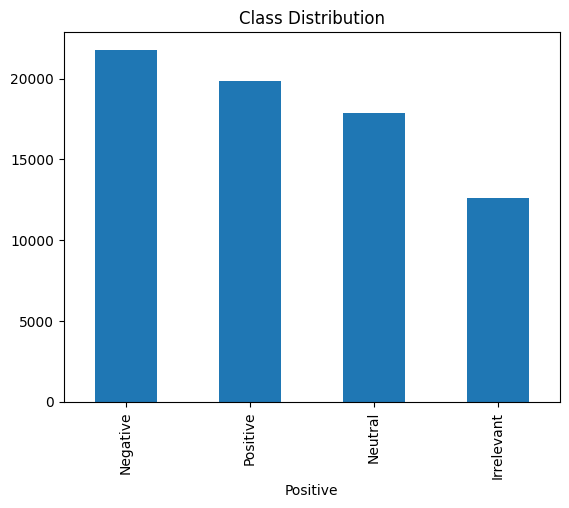

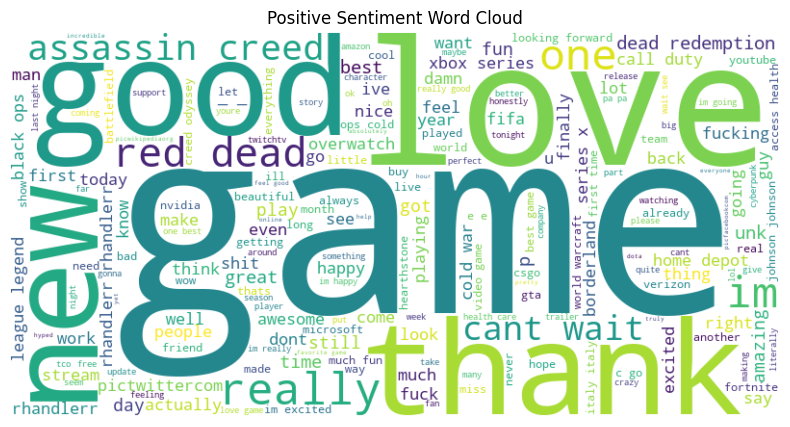

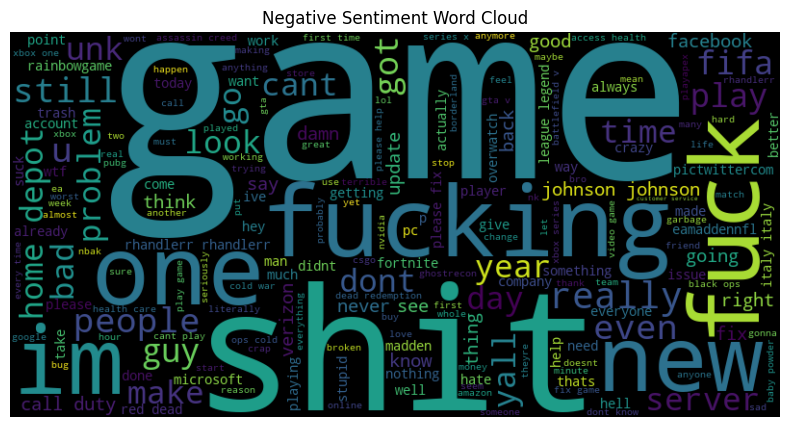

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

print(tweets_df['Positive'].value_counts())

tweets_df['Positive'].value_counts().plot(kind='bar', title='Class Distribution')
plt.show()

positive_text = ' '.join(tweets_df[tweets_df['Positive'] == 'Positive']['cleaned_text'])
negative_text = ' '.join(tweets_df[tweets_df['Positive'] == 'Negative']['cleaned_text'])

if not positive_text.strip():
    positive_text = "No positive words available"
if not negative_text.strip():
    negative_text = "No negative words available"
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment Word Cloud')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiment Word Cloud')
plt.show()





In [28]:

num_samples = 2000  
X_small, _, y_small, _ = train_test_split(X_scaled, y, train_size=num_samples, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_small, y_small, test_size=0.2, random_state=42)


In [29]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5225
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.52      0.51       189
           1       0.55      0.53      0.54       211

    accuracy                           0.52       400
   macro avg       0.52      0.52      0.52       400
weighted avg       0.52      0.52      0.52       400



In [12]:
from qiskit.circuit.library import PauliFeatureMap

feature_map = PauliFeatureMap(feature_dimension=num_qubits, reps=3, paulis=['Z', 'Y'])
quantum_kernel = QuantumKernel(feature_map=feature_map, quantum_instance=Aer.get_backend('qasm_simulator'))
qsvc = QSVC(quantum_kernel=quantum_kernel)
qsvc.fit(X_train_balanced, y_train_balanced)



QSVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', max_iter=-1,
     probability=False,
     quantum_kernel=<qiskit_machine_learning.kernels.quantum_kernel.QuantumKernel object at 0x000001B0C4EF85E0>,
     random_state=42, shrinking=True, tol=0.001, verbose=False)

In [17]:
import pandas as pd
df = pd.read_csv(r'C:\Users\dell\Downloads\tweets.csv') 
print("Shape of the dataset:", df.shape)
num_samples = df.shape[0] 
num_features = df.shape[1] 

print("Number of samples (rows):", num_samples)
print("Number of features (columns):", num_features)

Shape of the dataset: (75681, 4)
Number of samples (rows): 75681
Number of features (columns): 4


In [11]:
import numpy as np
import pandas as pd
from qiskit import Aer
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.kernels import QuantumKernel
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  
df = pd.read_csv(r'C:\Users\dell\Downloads\tweets.csv')
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_reduced = pca.fit_transform(X_scaled)

X_train = X_train[:500]
y_train = y_train[:500]
X_test = X_test[:100]
y_test = y_test[:100]

num_qubits = X_train.shape[1]  
feature_map = ZZFeatureMap(feature_dimension=num_qubits, reps=2, entanglement='circular')

quantum_instance = Aer.get_backend('statevector_simulator') 
quantum_kernel = QuantumKernel(feature_map=feature_map, quantum_instance=quantum_instance)

kernel_matrix_train = quantum_kernel.evaluate(x_vec=X_train)
kernel_matrix_test = quantum_kernel.evaluate(x_vec=X_test, y_vec=X_train)

svc = SVC(kernel='precomputed') 
svc.fit(kernel_matrix_train, y_train)
y_pred = svc.predict(kernel_matrix_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.53
Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.16      0.23        43
           1       0.56      0.81      0.66        57

    accuracy                           0.53       100
   macro avg       0.47      0.48      0.45       100
weighted avg       0.49      0.53      0.48       100

